# COMP9318-Lab3

## Instructions
1. This note book contains instructions for **COMP9318-Lab3**.

* You are required to complete your implementation in a file `submission.py` provided along with this notebook.

* You are not allowed to print out unnecessary stuff. We will not consider any output printed out on the screen. All results should be returned in appropriate data structures via corresponding functions.

* You can submit your implementation for **Lab3** via following link: http://kg.cse.unsw.edu.au/submit/ .

* For each question, we have provided you with detailed instructions along with question headings. In case of any problem, you can post your query @ Piazza.


* You are allowed to add other functions and/or import modules (you may have to in this lab), but you are not allowed to define global variables. **Only functions are allowed** in `submission.py`. 

* You should not import unnecessary modules/libraries, failing to import such modules at test time will lead to errors.

* We will provide immediate feedback on your submission. You can access your scores using the online submission portal on the same day. 

* For **Final Evaluation** we will be using a different dataset, so your final scores may vary.  

* You are allowed to submit as many times as you want before the deadline, but **ONLY the latest version will be kept and marked**.

* Submission deadline for this assignment is **23:59:59 on 2nd April, 2019**. We will **NOT** accept any late submissions.

# Question-1: Logistic Regression using Gradient Descent

* In this lab you are required to implement Logistic Regression using Gradient Descent.
* The training data is 2-dimensional data points from two classes namely: class-0, and class-1.

In [1]:
import pandas as pd
import numpy as np

data_file='./asset/a'
raw_data = pd.read_csv(data_file, sep=',')
raw_data.head()

,Col1,Col2,Label
0,0.464726,-0.552165,0.0
1,-0.465277,0.155947,0.0
2,-0.367907,0.337509,0.0
3,-1.703355,-0.511965,0.0
4,-0.193367,0.642282,0.0


You need to **implement** logistic regression classifier (i.e., `logistic_regression()` in the file: `submission.py`). 

* logistic(sigmoid) function 

In [2]:
def sigmoid(weights, X): 
    return 1.0/(1 + np.exp(-np.dot(X, weights.T))) 

* logistic gradient function 

In [3]:
def log_gradient(weights, X, y):
    first_deriv = sigmoid(weights, X) - y.reshape(X.shape[0], -1) 
    final_deriv = np.dot(first_deriv.T, X) 
    return final_deriv 

* cost function, J($\theta$) 

In [4]:
def cost_func(weights, X, y): 
    log_func_v = sigmoid(weights, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 

* gradient descent function 

In [5]:
def grad_descent(X, y, weights, lr=.01, num_epochs=5000): 
    cost = cost_func(weights, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(num_iter < num_epochs): 
        old_cost = cost 
        weights = weights - (lr * log_gradient(weights, X, y)) 
        cost = cost_func(weights, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return weights, num_iter  

* function to predict labels 

In [6]:
def pred_values(weights, X): 
    pred_prob = sigmoid(weights, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 

* function to plot decision boundary 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_reg(X, y, beta): 
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 

The input arguments of `logistic_regression()` are:
* `data`: Data in 2-columns format
* `labels`: Class-labels
* `weights`: The cofficients to be computed, initialized with ZEROS
* `num_epochs`: Number of epochs
* `learning_rate`: Learning rate of the algorithm 

The return value of `logistic_regression()` should be a numpy array containing the logistic regression **coefficients**. The bias term should be appended at the start of the array.


In [8]:
def logistic_regression(data, labels, weights, num_epochs, learning_rate):
    # do not change the heading of the function
    
    # stacking columns wth all ones in feature matrix 
    X = data[:, :]
    X = np.hstack((np.matrix(np.ones(data.shape[0])).T, X)) 
    
    weights = np.matrix(weights)
  
    # beta values after running gradient descent 
    weights, num_iter = grad_descent(X, labels, weights, learning_rate, num_epochs) 
    
    # estimated beta values and number of iterations 
    print("Estimated regression coefficients:", weights) 
    print("No. of iterations:", num_iter) 
    
    # predicted labels 
    y_pred = pred_values(weights, X) 
      
  
    # number of correctly predicted labels 
    print("Correctly predicted labels:", np.sum(labels == y_pred)) 
    
    # plotting regression line 
    plot_reg(X, labels, weights) 

    np.set_printoptions(precision=8)
    weights = np.squeeze(np.asarray(weights))

    return weights

* For example, a sample output is shown in the cell given below:

Estimated regression coefficients: [[-10.20342907  -2.29067514   5.31366198]]
No. of iterations: 50000
Correctly predicted labels: 5913


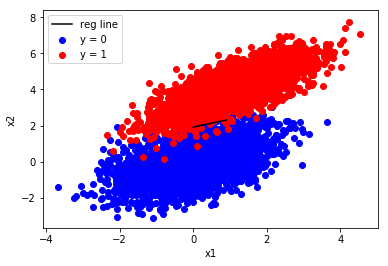

[-10.20342907  -2.29067514   5.31366198]


In [9]:
# Read in the Data...
raw_data = pd.read_csv(data_file, sep=',')
labels=raw_data['Label'].values
data=np.stack((raw_data['Col1'].values,raw_data['Col2'].values), axis=-1)

# Fixed Parameters. Please do not change values of these parameters...
weights = np.zeros(3) # We compute the weight for the intercept as well...
num_epochs = 50000
learning_rate = 50e-5      
  
coefficients=logistic_regression(data, labels, weights, num_epochs, learning_rate)
print(coefficients)

# Test Environment

For testing, we have pre-installed the requisite modules and/or libraries in the testing environment. You are only allowed to use following libraries:
* python: 3.6.5
* pandas: 0.22.0
* numpy: 1.14.3

NOTE: <br> 
* You are required to implement the logistic regression by yourself. You are not allowed to import **SKLEARN** and/or any **OTHER LIBRARY** in Lab3.
